<a href="https://colab.research.google.com/github/dikobernandiko/DataMining-2024/blob/main/Project_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

# **Eksplorasi Data Awal**

In [4]:
#menampilkan baris pertama
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [5]:
#Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#statistik deskriptif awal
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [7]:
#Kolom-kolom yang tersedia
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [8]:
#Cek data hilang
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


# **Visualisasi Data Awal**

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

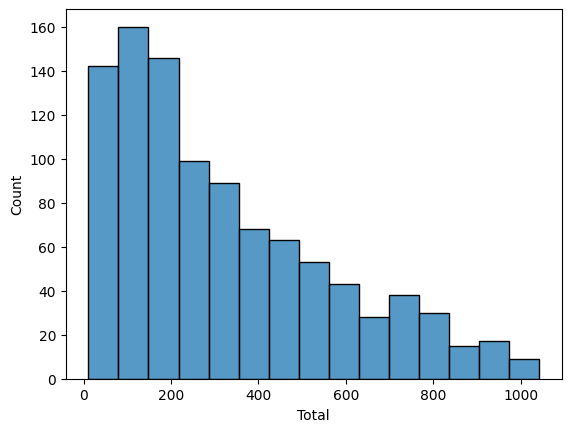

In [10]:
sns.histplot(df['Total'])
plt.show()

# **Data Preparation**

In [11]:
#mengecek data duplikat
print(df.duplicated().sum())

0


In [12]:
#Cek data kosong
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


Feature Engineering

In [14]:
#Mengkonversi kolom tanggal
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
#Menambahkan fitur hari dan bulan
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month

In [21]:
#Menentukan kategori waktu
def categorize_time(hour):
  if 10 <= hour < 14:
    return 'Morning'
  elif 14 <= hour < 18:
    return 'Afternoon'
  else:
      return 'Evening'

df['Time Category'] = df['Time'].str.split(':').str[0].astype(int).apply(categorize_time)

Exploratory Data Analysis (EDA)

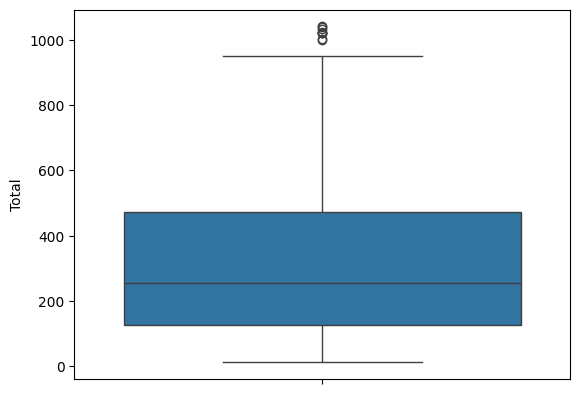

In [22]:
#Distribusi Variabel Numerik
sns.boxplot(df['Total'])
plt.show()

In [26]:
print(df.dtypes)

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day                                object
Month                               int32
Time Category                      object
dtype: object


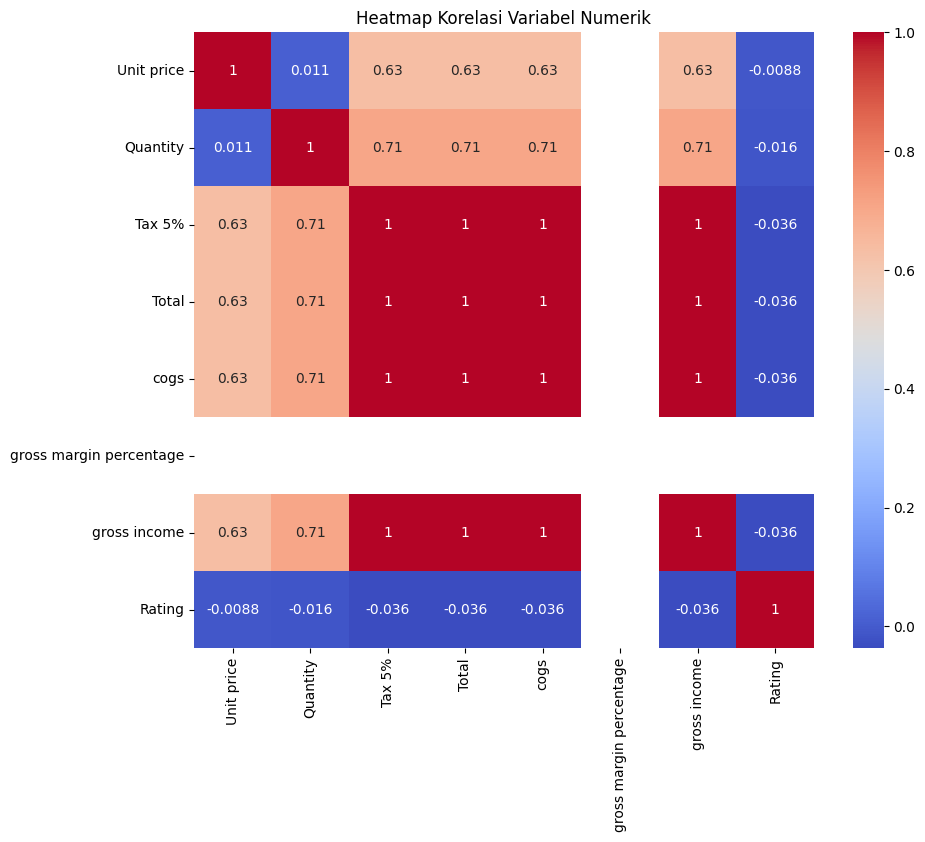

In [27]:
#Membuat heatmap korelasi
numeric_columns = df[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating']]

plt.figure(figsize=(10,8))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

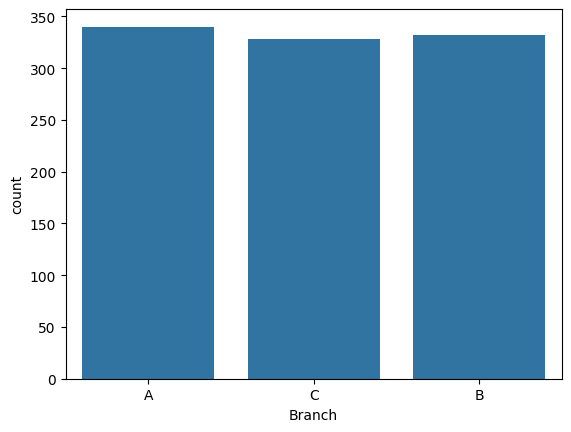

In [28]:
sns.countplot(x='Branch', data=df)
plt.show()

Data Scaling dan Encoding


In [29]:
from sklearn.preprocessing import StandardScaler

In [33]:
#Scaling data numerik
scaler = StandardScaler()
df[['Unit price','Total','gross income']] = scaler.fit_transform(df[['Unit price','Total','gross income']])

In [35]:
print(df.columns)

Index(['Invoice ID', 'City', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Day', 'Month',
       'Time Category', 'Customer type_Member', 'Customer type_Normal',
       'Branch_A', 'Branch_B', 'Branch_C', 'Payment_Cash',
       'Payment_Credit card', 'Payment_Ewallet'],
      dtype='object')


Split Datasets
